# Modal Tutorial 03: Vibrations of Systems with Multiple Degrees of Freedom

The previous tutorial focused on the basis of vibrations analysis using single degree of freedom systems.  However, in the real world, the vast majority of systems and structures are better modelled with multiple degrees of freedom.  This tutorial will therefore focus on multiple degree of freedom systems.

## A Spring Mass System with 2 Degrees of Freedom

To start out, we will examine a simple spring mass system with two degrees of freedom.

![2-mass System](figures/spring_mass_2.svg)

The mass $m_1$ is attached to a spring with constant $k_1$, and that spring is attached to mass $m_2$.  Mass $m_2$ is also attached to spring $k_2$, which is attached to a rigid ground.

To start out, let's derive the equations of motion for this system.  We will first compute the forces on $m_1$.  There is an internal spring force on $m_1$ that is equal to $-k_1 x_1$ where $x_1$ is the displacement of mass $m_1$.  The spring may also apply a force on mass $m_1$ if mass $m_2$ moves upwards, which will be $k_1 x_2$ where $x_2$ is the motion of mass $m_2$.  The total contribution of the spring $k_1$ to the force on mass $m_1$ is then $k_1(x_2-x_1)$.  There may also be an external force $f_1$ applied to mass $m_1$ that could cause it to accelerate.

$$m_1 \ddot{x}_1 = k_1(x_2-x_1) + f_1$$

Performing the similar analysis on mass $m_2$, we have the equal and opposite contribution from spring $k_1$, which is $k_1(x_1-x_2)$.  We also have the contribution from spring $k_2$, which is $-k_2 x_2$.  Finally, there may also be an external force $f_2$ applied directly to mass $m_2$.

$$m_2 \ddot{x}_2 = k_1(x_1-x_2) -k_2 x_2 + f_2$$

At this point, we can rearrange the equations of motion such that the $x$ terms are on one side of the equation and the $f$ terms are on the other.  We will collect coefficients of $x_1$ and $x_2$ and their derivatives.

$$m_1 \ddot{x}_1 + k_1 x_1 - k_1 x_2 = f_1$$
$$m_2 \ddot{x}_2 - k_1 x_1 + (k_1 + k_2) x_2 = f_2$$

Whenever we have linear systems of equations, it is usually helpful to be able to analyze them using linear algebra techniques, so we will rearrange the equations into a set of matrix equations.

$$ \begin{bmatrix} m_1 & 0 \\ 0 & m_2\end{bmatrix}\begin{bmatrix}\ddot{x}_1\\\ddot{x}_2\end{bmatrix} + \begin{bmatrix} k_1 & -k_1 \\ -k_1 & k_1+k_2\end{bmatrix}\begin{bmatrix}{x}_1\\{x}_2\end{bmatrix} = \begin{bmatrix}{f}_1\\{f}_2\end{bmatrix}$$

or

$$\mathbf{M}\ddot{\mathbf{x}}+\mathbf{K}\mathbf{x} = \mathbf{f}$$

where the mass matrix $\mathbf{M} = \begin{bmatrix} m_1 & 0 \\ 0 & m_2\end{bmatrix}$, the stiffness matrix $\mathbf{K} = \begin{bmatrix} k_1 & -k_1 \\ -k_1 & k_1+k_2\end{bmatrix}$, the displacement vector $\mathbf{x} = \begin{bmatrix}{x}_1\\{x}_2\end{bmatrix}$, and the force vector $\mathbf{f} = \begin{bmatrix}{f}_1\\{f}_2\end{bmatrix}$.  There are a few things to note here.  Firstly, the mass matrix is diagonal, with zeros on the off-diagonal.  This is sometimes referred to as a lumped mass matrix, because all of the mass is lumped onto each degree of freedom, the degrees of freedom do not share mass.  Another note is that both the mass and stiffness matrices are diagonal.  This will always be true for real systems.  If degree of freedom 1 shares mass with degree of freedom 2, then that is equvalent to saying that degree of freedom 2 also shares mass degree of freedom 1.  Additionally Newton's law of equal and opposite forces requires that if there is a force from degree of freedom 1 onto degree of freedom 2, then there will need to be an equal and opposite force on degree of freedom 2 on degree of freedom 1.

## Free Response of Multiple Degree of Freedom Systems

Let's now look at an example of free response of this system.

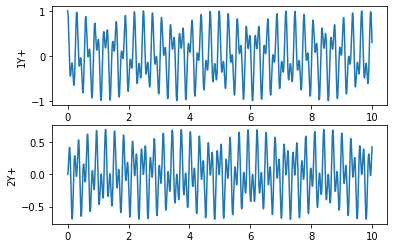

In [1]:
# Import modules
import numpy as np
import sdynpy as sdpy

# Set our parameters
m1 = 1
m2 = 2
k1 = 1000
k2 = 1500

# Construct the matrices
M = np.array([[m1, 0],
              [ 0,m2]])
K = np.array([[ k1,  -k1],
              [-k1,k1+k2]])

# Name the degrees of freedom
dofs = sdpy.coordinate_array([1,2],'Y+')

# Construct a SDynPy System
system = sdpy.System(dofs,M,K)

# Set up the initial state by holding m2 fixed and pulling back m1.  Both will start with zero velocity.
initial_state = [1,0,0,0]

# No external forces
force_signals = np.zeros((2,10000))
dt = 1/1000

# Integrate equations of motion
responses,forces = system.time_integrate(force_signals,dt,initial_state=initial_state,displacement_derivative=0)

# Plot the responses
responses.plot(one_axis=False);

It is obvious here that the responses are much more complicated than in the single degree of freedom case.  In that case, there was only one sine wave for an undamped system.  Here, we now have sinusodial-like motion, but it is more complex.

Let's look at the frequency domain to understand what is happening in the response signals that we are showing.

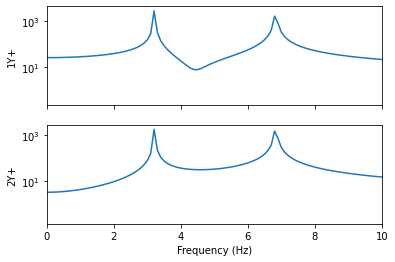

In [2]:
responses_fft = responses.fft()

ax = responses_fft.plot(one_axis=False,subplots_kwargs={'sharex':True})

for a in ax:
    a.set_yscale('log')
    a.set_xlim(0,10)
ax[-1].set_xlabel('Frequency (Hz)');

In the frequency domain plot, instead of one main frequency component corresponding to one sine wave response, we now see two main components at different frequencies.  This means that our response is now a superposition of multiple frequencies rather than just a single frequency!

### Adding Damping
Similar to the single degree of freedom case, we can add damping to the system, as all real structures will have some amount of damping.  We will add dampers to the system $c_1$ and $c_2$ at the same positions as $k_1$ and $k_2$, so the structure of the damping matrix will be similar to the stiffness matrix.  Recall that dampers oppose velocity rather than displacement.  The motion $\dot{x}_1$ of the mass $m_1$ will induce a damping force $-c_1 \dot{x_1}$ to mass $m_1$.  Similar to the spring, motion $\dot{x}_2$ of the mass $m_2$ will also induce a damping force $c_1 \dot{x_2}$ to mass $m_1$.  The damper affects on mass $m_2$ can be similarly derived.  The damped equations of motion are now

$$m_1 \ddot{x}_1 + c_1 \dot{x}_1 - c_1 \dot{x}_2 + k_1 x_1 - k_1 x_2 = f_1$$
$$m_2 \ddot{x}_2 - c_1 \dot{x}_1 + (c_1 + c_2) \dot{x}_2 - k_1 x_1 + (k_1 + k_2) x_2 = f_2$$

Which we can combine into matrix form

$$ \begin{bmatrix} m_0 & 0 \\ 0 & m_1\end{bmatrix}\begin{bmatrix}\ddot{x}_0\\\ddot{x}_1\end{bmatrix} + \begin{bmatrix} c_0 & -c_0 \\ -c_0 & c_0+c_1\end{bmatrix}\begin{bmatrix}\dot{x}_0\\\dot{x}_1\end{bmatrix}+ \begin{bmatrix} k_0 & -k_0 \\ -k_0 & k_0+k_1\end{bmatrix}\begin{bmatrix}{x}_0\\{x}_1\end{bmatrix} = \begin{bmatrix}{f}_0\\{f}_1\end{bmatrix}$$

or

$$\mathbf{M}\ddot{\mathbf{x}}+\mathbf{C}\dot{\mathbf{x}}+\mathbf{K}\mathbf{x} = \mathbf{f}$$

We can add damping to our numerical model to see how it behaves.

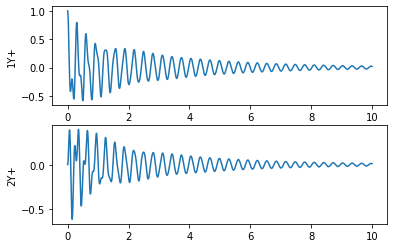

In [3]:
c1 = 1.25
c2 = 2.5

C = np.array([[ c1,  -c1],
              [-c1,c1+c2]])

# Construct a SDynPy System
system = sdpy.System(dofs,M,K,C)

# Set up the initial state by holding m2 fixed and pulling back m1.  Both will start with zero velocity.
initial_state = [1,0,0,0]

# No external forces
force_signals = np.zeros((2,10000))
dt = 1/1000

# Integrate equations of motion
responses,forces = system.time_integrate(force_signals,dt,initial_state=initial_state,displacement_derivative=0)

# Plot the responses
responses.plot(one_axis=False);

Clearly, the part's response is decaying over time.  Interestingly, the two frequency components do not appear to decay at the same rate.  We can see that the higher frequency vibration seems to decay more quickly, leaving a response that looks very much like a single degree of freedom decay towards the end of the time segment.

## Multiple Degree of Freedom Response to Harmonic Excitation

The previous section showed that the free decay of a multiple degree of freedom system in general can contain multiple response components.  Let's see what the response to harmonic excitation looks like.

We will again rely on the complex exponential formulation seen previously in the single degree of freedom case.  Again, it is accepted that the real part of this equation will be retained.  In this case, our forces will have the general form

$$\mathbf{f} = \begin{bmatrix}F_1\\F_2\\ \vdots \\ F_i\end{bmatrix}e^{i\omega t} = \mathbf{F}e^{i\omega t}$$

For a general multiple degree of freedom system, there will be one external force on each degree of freedom $i$, and the values $F_i$ are complex numbers, which means each forces being input on each degree of freedom can have different amplitudes (including zero, or no force) as well as a different phases (i.e. pushing on one mass while you pull on another).

The general response to such an input will similarly be

$$\mathbf{x} = \begin{bmatrix}X_1\\X_2\\ \vdots \\ X_i\end{bmatrix}e^{i\omega t} = \mathbf{X}e^{i\omega t} $$

where the coefficients $X_i$ are also complex numbers, which will have amplitude and phase.  Substituting into the matrix equation, we obtain 

$$(i\omega)^2\mathbf{M}{\mathbf{X}}e^{i\omega t}+i\omega\mathbf{C}{\mathbf{X}}e^{i\omega t}+\mathbf{K}\mathbf{X}e^{i\omega t} = \mathbf{F}e^{i\omega t}$$

Cancelling out the non-zero transient $e^{i\omega t}$ and collecting terms $\mathbf{X}$ leaves the general frequency-domain matrix equation.

$$(-\omega^2\mathbf{M}+i\omega\mathbf{C}+\mathbf{K})\mathbf{X} = \mathbf{F}$$

The term $-\omega^2\mathbf{M}+i\omega\mathbf{C}+\mathbf{K}$ is often referred to as the dynamic stiffness matrix and assigned the value $\mathbf{Z}$.

$$ \mathbf{Z} = -\omega^2\mathbf{M}+i\omega\mathbf{C}+\mathbf{K}$$

$$ \mathbf{Z}\mathbf{X} = \mathbf{F} $$

This term is denoted a dynamic stiffness due to the fact that it tells us the sinusoidal force required for a given displacement.  We generally would like to go the opposite direction, where we predict the responses $\mathbf{X}$ from a given sinusoidal force $\mathbf{F}$.  In order to do this, we will need to invert the dynamic stiffness matrix $\mathbf{Z}$

$$ \mathbf{X} = \mathbf{Z}^{-1}\mathbf{F} = \mathbf{H}\mathbf{F}$$

The matrix $\mathbf{H}=\mathbf{Z}^{-1}$ is often referred to as the **frequency response function matrix** because it similarly shows the response amplitudes and phases due to the amplitudes and phases of the input forces at a given frequency line.  Note that because $\mathbf{X}$ and $\mathbf{F}$ are matrices we cannot go as far as to say $\mathbf{H} = \mathbf{X}/\mathbf{F}$, so we leave it as the previous equation $\mathbf{X} = \mathbf{H}\mathbf{F}$.

Let's walk through the above theory using the example system.  First we will compute the frequency response function matrix $\mathbf{H}$.

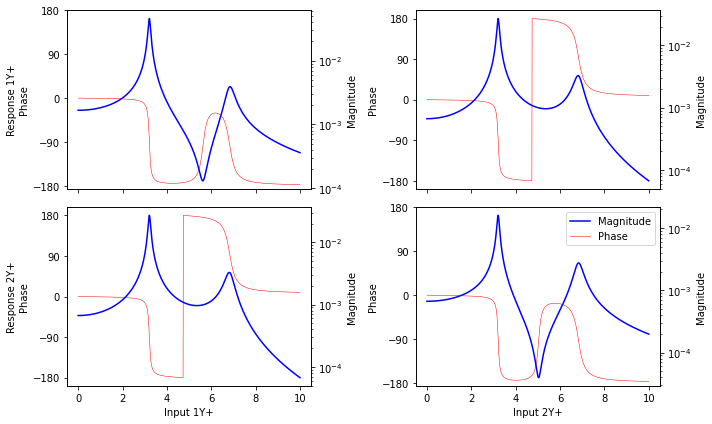

In [4]:
frequencies = np.linspace(0,10,1001)

# We will use numpy's broadcasting functionality to avoid a for-loop to loop over each frequency line
omega = 2*np.pi*frequencies[:,np.newaxis,np.newaxis]
# omega is now a 1001 x 1 x 1 array, so if we combine it with the system matrices which are 2 x 2, we
# will end up with a 1001 x 2 x 2 array for a Z matrix, where the mathematics are automatically
# performed over each entry in omega.
Z = -omega**2*M + 1j*omega*C + K # 1001 x 2 x 2

H = np.linalg.inv(Z)

# Plot the components of the H matrix
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,2,num='Frequency Response Function Matrix',figsize=(10,6),sharex=True)
for response_name,response_frfs,axes_row in zip(system.coordinate,np.moveaxis(H,0,-1),axes):
    axes_row[0].set_ylabel('Response {:}\nPhase'.format(str(response_name)))
    axes_row[1].set_ylabel('Phase')
    for frf,phase_axis in zip(response_frfs,axes_row):
        phase_handle = phase_axis.plot(frequencies,np.angle(frf)*180/np.pi,'r',linewidth=0.5)
        phase_axis.set_yticks([-180,-90,0,90,180])
        mag_axis = phase_axis.twinx()
        magnitude_handle = mag_axis.plot(frequencies,np.abs(frf),'b')
        mag_axis.set_yscale('log')
        mag_axis.set_ylabel('Magnitude')
for input_name,ax in zip(system.coordinate,axes[-1]):
    ax.set_xlabel('Input {:}'.format(str(input_name)))
axes[-1,-1].legend([magnitude_handle[0],phase_handle[0]],['Magnitude','Phase'])
fig.tight_layout()

Here we can see in the above plot there are four entries in the frequency response function matrix; the first column corresponds to forces applied at mass $m_1$, and the second column corresponds to forces applied at mass $m_2$.  The first row corresponds to responses at mass $m_1$ and the second row corresponds to responses at mass $m_2$.  Therefore, to compute the response at, for example, $m_1$ due to a force at $m_2$, you would look at the first row and second column of the frequency response function matrix.  Each entry in the frequency response function matrix is still a complex number and can be plotted either with real and imaginary part or magnitude and phase.  For the above plots, the magnitude is plotted in blue, and the phase is plotted in red.

Let's examine some of the features of the plots.  Similar to the single degree of freedom case, the frequency response functions have peaks, which are resonances of the structure.  Unlike the single degree of freedom case, we now have steep valleys in the plots, which are called anti-resonances.  These are frequencies that the structure does not like to respond.  Note that while resonances tend to be global (peaks occur at the same frequency for all degrees of freedom), anti-resonances tend to be local to the specific degree of freedom (the anti-resonance in the 1,1 plot occurs at 5.59 Hz, and the anti-resonance in the 2,2 plot occurs at 5.02 Hz).

Note the diagonal entries in the plots are the plots where the response is equal to the input.  These are called drive point frequency response functions, because they are the frequency response functions for just the point that is being driven by the force.  Drive point frequency response functions have special properties, namely there is always an anti-resonance between each consecutive pair of resonances, and the phase is always one-sided, meaning it is always positive or always negative for a displacement or an acceleration frequency response function.

Another interesting aspect is the behavior of the phase as it goes through a resonance or anti-resonance.  In the single degree of freedom case, we saw the phase flip 180 degrees as it travelled through resonances.  This still holds here, but now the phase can traverse multiple resonances, reducing by 180 degrees each time (note that the phase will wrap around from -180 to 180, or from 0 to 360 depending on how it is plotted, due to it being a circular quantity).  Interestingly, after passing an anti-resonance the phase will increase by 180 degrees.  This behavior combined with the flipping between anti-resonance and resonance in the drive point frequency response functions is what keeps the phase on one half of the unit circle for the drive point frequency response functions.

Finally, thinking back to the damping investigations performed in the single degree of freedom tutorial, it looks as if the second peak has more damping associated with it: the second peak is less sharp and is at a lower amplitude than the first peak.

Clearly there is a lot that can be learned aboud a system from its frequency response functions.  Let's look at the same information, this time in the real and imaginary parts.

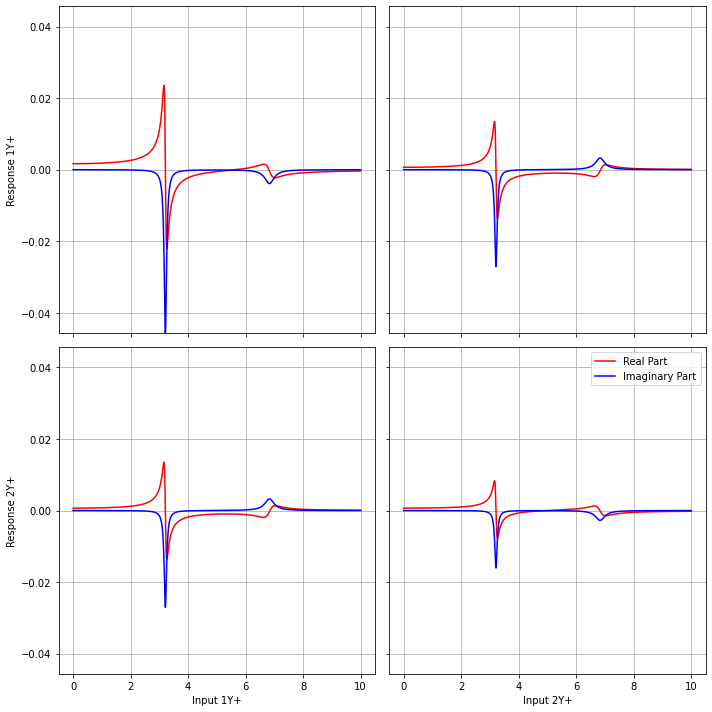

In [5]:
# Plot the components of the H matrix
axis_extent = np.max([np.abs(H.real),np.abs(H.imag)])

fig,axes = plt.subplots(2,2,num='Frequency Response Function Matrix',figsize=(10,10),sharex=True,sharey=True)
for response_name,response_frfs,axes_row in zip(system.coordinate,np.moveaxis(H,0,-1),axes):
    axes_row[0].set_ylabel('Response {:}'.format(str(response_name)))
    for frf,axis in zip(response_frfs,axes_row):
        axis.plot(frequencies,np.real(frf),'r')
        axis.plot(frequencies,np.imag(frf),'b')
        axis.set_ylim(-axis_extent,axis_extent)
        axis.grid(True)
for input_name,ax in zip(system.coordinate,axes[-1]):
    ax.set_xlabel('Input {:}'.format(str(input_name)))
axes[-1,-1].legend(['Real Part','Imaginary Part'])
fig.tight_layout()

Looking at the real and imaginary parts of the frequency response functions is also instructive.  Similar to the single degree of freedom case, the real part of the frequency response function will tend to go through zero at a resonance, and the imaginary part will peak at the resonance.  Anti-resonances will tend to appear where the real part is crossing the zero line.  For the drive point, the imaginary part will always be one-sided, it should never cross zero.

## Working with Multiple Degree of Freedom Systems in SDynPy

Working with multiple degree of freedom systems in SDynPy is almost identical to working with single degree of freedom systems, except for some inputs to functions must now be two-dimensional arrays.  The key data type in SDynPy for working with multiple degree of freedom mass/spring/damper systems remains the `sdpy.System` object.  This object accepts mass, stiffness, and damping values, and stores them along with coordinate information for each degree of freedom.  Labeling and keeping track of degrees of freedom becomes incredible important in multiple degree of freedom systems, as we need to keep track of where our forces are going in, and where our responses are coming out.  Degrees of freedom can be defined with the `sdpy.coordinate_array` function, which allows definition of degree of freedom information.  Let's create a demonstration object now, with different parameters than we used before.  In this case, we will only include one damper between the two masses.

In [6]:
import sdynpy as sdpy

# Set our parameters
m1 = 1
m2 = 2
k1 = 2000
k2 = 500
c1 = 0.3

# Construct the matrices
M = np.array([[m1, 0],
              [ 0,m2]])
K = np.array([[ k1,  -k1],
              [-k1,k1+k2]])
C = np.array([[ c1,  -c1],
              [-c1, c1]])

# Name the degrees of freedom
dofs = sdpy.coordinate_array([1,2],'Y+')

# Construct a SDynPy System
system = sdpy.System(dofs,M,K,C)

We can now use the `System` object to interogate our system.  Like the single degree of freedom case, we can still compute frequency response functions, but now we can also pass in coordinate information to only retrieve certain rows and columns of the frequency response function matrix.  For example, if we wanted all frequency responses from all responses, but only the first force locations, we can specify a `CoordinateArray` object to the `frequency_response` method using the `references` and `responses` optional arguments.

Getting FRFs from forces at 1Y+ and responses ['1Y+' '2Y+']


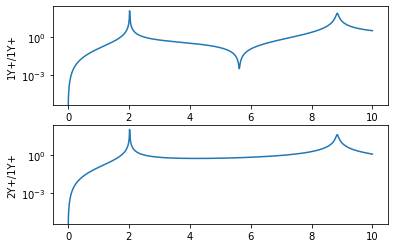

In [7]:
input_force_location = dofs[0]
output_response_location = dofs

print('Getting FRFs from forces at {:} and responses {:}'.format(str(input_force_location),
                                                                 str(output_response_location)))

frequencies = np.linspace(0,10,1000)
frf = system.frequency_response(frequencies,displacement_derivative = 2,references=input_force_location,
                               responses = output_response_location)
frf.plot(one_axis=False);

Similarly, we can integrate equations of motion for multiple degree of freedom systems to get time responses.  We can similarly choose which degrees of freedom to put forces into, and we can also choose which response degrees of freedom we would like to obtain.  For example, we could put a shaker at each mass at different frequencies and measure the response at the first mass:

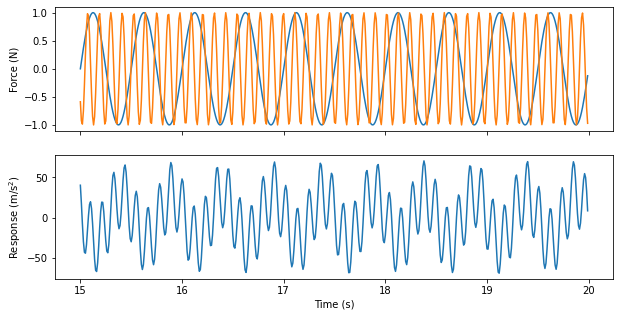

In [8]:
excitation_frequencies = [2,8.84] # Hz
dt = 1/100 
num_samples = 2000
force_signal = sdpy.generator.sine(excitation_frequencies,dt,num_samples)
# Note: force signal is now a 2 x 3000 signal due to the broadcasting of the frequencies in the sine function.

responses,references = system.time_integrate(force_signal,dt,displacement_derivative=2,
                                             responses = dofs[0],integration_oversample=10)

fig,ax = plt.subplots(2,1,num='Time Integration',figsize=(10,5),sharex=True)
responses.extract_elements_by_abscissa(15,np.inf).plot(ax[1])
references.extract_elements_by_abscissa(15,np.inf).plot(ax[0])
ax[0].set_ylabel('Force (N)')
ax[1].set_ylabel('Response (m/s$^2$)')
ax[1].set_xlabel('Time (s)');

## Summary
In this section, we looked at how to write equations of motion for a multiple degree of freedom system and assemble them into a matrix form.  We then looked at how we can compute frequency response function matrices for those systems.  In the next tutorial, we will revisit modal analysis to try to pull physical meaning out of the frequency response functions.

## Homework Problems

This section contains some example problems to see if you can use SDynPy on your own to set up and analyze a multiple degree of freedom system.

### 1. Writing Equations of Motion

Write the equations of motion for the following system, where mass 1 and mass 2 are connected with spring 1 and damper 1, mass 1 and mass 3 are connected with spring 4, mass 3 and mass 2 are connected with spring 3 and damper 2, and mass 2 is connected to the ground with spring 2.  Transform the equations of motion into mass, stiffness, and damping representations.  Make sure your matrices are diagonal!

![3-mass System](figures/spring_mass_3.svg)

### 2. Compute the Frequency Response Function Matrix

Compute the full 3 x 3 frequency response function matrix for this system and plot it in a 3 x 3 grid.  For parameters, use $m_1=10$, $m_2 = 30$, $m_3 = 1$, $k_1 = 10000$, $k_2 = 2500$, $k_3 = 1500$, $k_4 = 1500$, $c_1 = 30$, and $c_2 = 50$.

### 3. Identifying Drive Points

Flatten your 2D frequency response function matrix using `np.flatten()` and then shuffle it around using `np.random.shuffle()`.  Can you identify the three drive point frequency response functions without referencing the unshuffled version?  What are the distinguishing features of a drive point frequency response function?